In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [28]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [29]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [30]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [41]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Session(engine)

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


In [47]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Query Date: ", last_date)

Query Date:  ('2017-08-23',)


In [48]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date :", query_date)

Query Date : 2016-08-23


In [49]:
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
for record in data:
    print(record)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [51]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precipt_data).set_index('date')

# Rename the column
precip_df = precip_df.rename(columns={'prcp':'Precipitation'})

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='date').dropna()
precip_df.head()

NameError: name 'precipt_data' is not defined

In [54]:

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(data, columns = ["date", "prcp"])
precip_df.set_index("date", inplace=True)

# Sort the dataframe by date
precip_df = precip_df.sort_values(["date"])
precip_df.head(100)

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2016-09-07,0.05
2016-09-07,0.11
2016-09-07,0.10


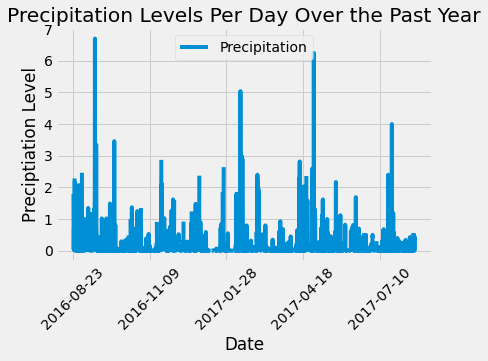

In [93]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_df.plot(rot=45)

# Rename the column
precip_df = precip_df.rename(columns={'prcp':'Precipitation'})

#set labels
ax.set_ylabel("Preciptiation Level");
ax.set_xlabel("Date");
ax.set_title("Precipitation Levels Per Day Over the Past Year");
#saveoutput file
plt.savefig("Output/Precipitation analysis.png")

plt.show()

In [61]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [76]:
# Design a query to show how many stations are available in this dataset? WHY DOESN'T EITHER OF THESE WORK?
session.query(func.count(Station.station)).all()

AttributeError: 'Session' object has no attribute 'station'

In [79]:
# Design a query to show how many stations are available in this dataset?  WHY DOESN'T EITHER OF THESE WORK?
station_count = session.query(func.count(Station.id)).all()
station_count

AttributeError: 'Session' object has no attribute 'id'

In [80]:
# What are the most active stations? (i.e. what stations have the most rows)?

# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
#get active station this was out of order
most_active_station=session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()
most_active= most_active_station[0]
most_active

'USC00519281'

In [86]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
#find out how to put labels on it

[(54.0, 85.0, 71.66378066378067)]

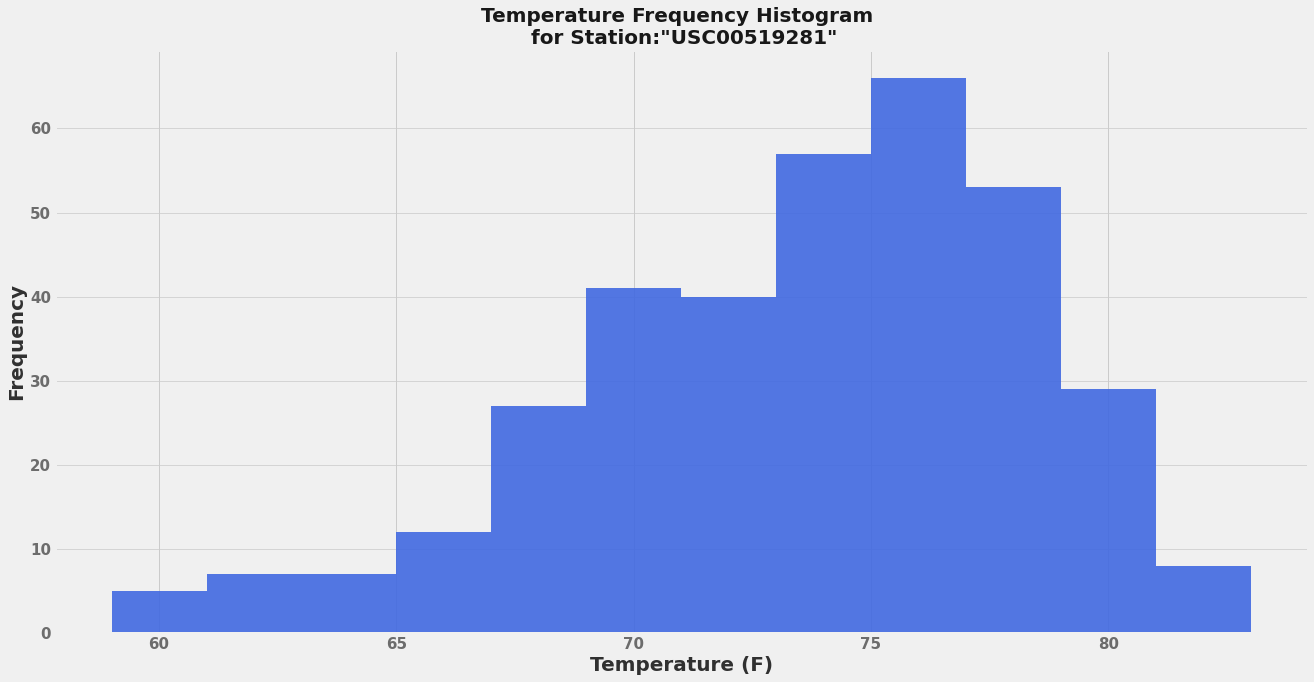

In [92]:
# Choose the station with the highest number of temperature observations.
temperature = session.query(Measurement.date,  Measurement.tobs).\
                    filter(Measurement.station == "USC00519281").\
                    filter(func.strftime("%Y-%m-%d", Measurement.date) >= '2016-08-23').all()

# Temperature dataframe cleanning process
temperature_df = pd.DataFrame(temperature, columns=['Date', 'Temperature'])
temperature_df = temperature_df.sort_values(by='Date', ascending=True)
temperature_df.set_index('Date', inplace=True)
# Resize Plot
plt.figure(figsize=[20,10]);

# Define Histogram paramaters
n, bins, patches = plt.hist(x=temperature_df["Temperature"], bins=12, 
                           color='royalblue',alpha=0.9);
# Labeling, tickers and grids
plt.grid(axis='y', alpha=0.75);
plt.xlabel('Temperature (F)',fontweight="bold", alpha=0.8, fontsize=20);
plt.ylabel('Frequency',fontweight="bold", alpha=0.8, fontsize=20);
plt.xticks(fontsize=15, fontweight="bold", alpha=0.55);
plt.yticks(fontsize=15, fontweight="bold", alpha=0.55);
plt.title('Temperature Frequency Histogram \n for Station:"USC00519281"',
          fontweight="bold", alpha=0.9, fontsize=20);

# Save Plot
plt.savefig("Output/Fig 2. Histogram - Temperature Frequency for Station USC00519281" +'.png',bbox_inches='tight');

#Show the Plot
plt.show();

## Bonus Challenge Assignment

In [67]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [94]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
vac_start_date = "2016-12-20"
vac_end_date = "2016-12-30"

# for your trip using the previous year's data for those same dates.
vac_startprev_date = "2016-12-20"
vac_endprev_date = "2016-12-30"

# Max, min and average calculation
min_vacation_temp = calc_temps(vac_startprev_date, vac_endprev_date)[0][0]
avg_vacation_temp = calc_temps(vac_startprev_date, vac_endprev_date)[0][1]
max_vacation_temp = calc_temps(vac_startprev_date, vac_endprev_date)[0][2]

print(min_vacation_temp, avg_vacation_temp, max_vacation_temp)

65.0 72.45833333333333 78.0


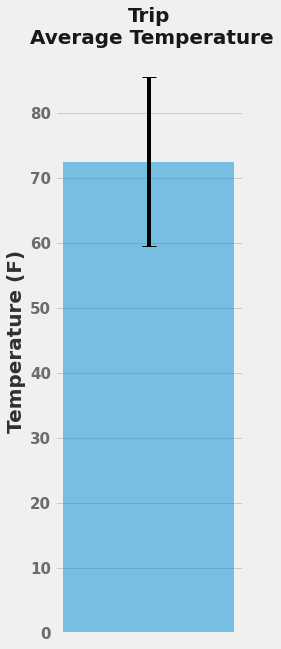

In [95]:
# Plot the results from your previous query as a bar chart.
error_prev_year = max_vacation_temp-min_vacation_temp

# Use "Trip Avg Temp" as your Title

# Use the average temperature for the y value

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


# Resize Plot
plt.figure(figsize=[3,10]);

# Define Bar and Error paramaters
plt.bar(1, avg_vacation_temp, yerr=error_prev_year, align='center', alpha=0.5, 
        ecolor='black', capsize=7)

# Labeling, tickers and grids

plt.ylabel('Temperature (F)',fontweight="bold", alpha=0.8, fontsize=20);
plt.xticks(fontsize=15, fontweight="bold", alpha=0.55);
plt.yticks(fontsize=15, fontweight="bold", alpha=0.55);
plt.title('Trip\n Average Temperature',
          fontweight="bold", alpha=0.9, fontsize=20);
plt.grid(b=None, which='major', axis='x')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Save Plot
plt.savefig("Output/Fig 3. Barchart - Trip Average Temperature" +'.png',bbox_inches='tight');

#Show the Plot
plt.show();

In [102]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
   filter(Station.station == Measurement.station).\
       filter(Measurement.date >= '2016-12-20').filter(Measurement.date <= '2016-12-30').\
           group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()



# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



AttributeError: 'Session' object has no attribute 'station'

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [99]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [100]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
